# Support Vector Machine Classifiers 

In this assignment, we use the scikit-learn package to train an SVM classifier. To do so, we need to tune 2 hyperparameters: the cost $C$ and precision $\gamma$ (gamma). We are going to use $K$-fold cross-validation to determine the best combination of values for this pair.

 - <a href='#question0'>Question 0</a> (0%) Have a look at the 3 first cells. In the <a href='#third-cell'>third one</a>, take note of how the `SVC` object is instantiated and trained, how labels are predicted, and finally how the fitting error is computed. In this assignment, the prediction error after a given training is simply defined as the *number of misclassified labels*.
 - <a href='#question1'>Question 1</a> (60%) Using an SVM classifier with an RBF kernel, use 10-fold cross-validation to find the best cost and precision parameters. The range of test values for each parameter is provided. 
  - <a href='#question1a'>a.</a> First compute the cross-validation error matrix: for each parameter combination, instantiate an SVM classifier; for each split provided by the `KFold` object, re-train this classifier and compute the prediction error; the cross-validation error is the average of these errors over all splits.
  - <a href='#question1b'>b.</a> Use the error matrix to select the best parameter combination. 
  - <a href='#question1c'>c.</a> Visualize the error matrix using `imshow` and the 'hot' colormap.
 - <a href='#question2'>Question 2</a> (30%) Plot the decision boundaries of this classifier, by appropriately modifying the code from the previous assignments. Display the support vectors on the same figure.
 - <a href='#question3'>Question 3</a> (10%) Evaluate and print the generalization error of this classifier, computed on the test set.

<a id='question0'></a>

# Code

## Imports

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline

## Load and display the training data

features size: (500, 2)
labels size: (500,)


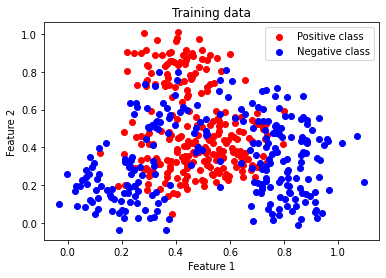

In [17]:
features = np.load("features.npy")
labels = np.load("labels.npy")
print("features size:", features.shape)
print("labels size:", labels.shape)

# Extract features for both classes
pos = labels == 1  # 1D array of booleans, with pos[i] = True if labels[i] == 1
features_pos = features[pos]  # filter the array with the boolean array
neg = labels != 1
features_neg = features[neg]

# Display data
fig, ax = plt.subplots()
ax.scatter(features_pos[:, 0], features_pos[:, 1], c="red", label="Positive class")
ax.scatter(features_neg[:, 0], features_neg[:, 1], c="blue", label="Negative class")
ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

plt.show()

<a id='third-cell'></a>

## Training the SVM classifier with arbitrary hyperparameters

In [18]:
cost = 1
gamma = 1

# Train the SVM classifier.
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)

# Predict labels.
# Note that here we use the same set for training and testing,
# which is not the case in the remainder of the assignment.
predicted_labels = svm.predict(features)

# Compute the error.
# Note: since in Python, True and False are equivalent to 1 and 0, we can
# directly sum over the boolean array returned by the comparison operator. 
error = sum(labels != predicted_labels)
print("Prediction error:", error)

correct = sum(test_labels == predicted_labels)
accuracy = correct/(error+correct)
print('Prediction Accuracy:', accuracy)

Prediction error: 98
Prediction Accuracy: 0.7215909090909091


<a id='question1'></a>

## Training with K-fold cross-validation

### Define test values for the cost and precision parameters 

In [4]:
def logsample(start, end, num):
    return np.logspace(np.log10(start), np.log10(end), num, base=10.0)

num_gammas = 20
num_costs = 20
gamma_range = logsample(1e-1, 1e3, num_gammas)
cost_range = logsample(1e-1, 1e3, num_costs)

In [5]:
gamma_range

array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03])

<a id='question1a'></a>

### Compute the cross-validation error for each parameter combination

The `KFold` class from scikit-learn is a "cross-validation" object, initialized with a number of folds. For each fold, it randomly partitions the input data into a training set and a validation set. The <a href='http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>documentation</a> provides an example of use.

In [6]:
K = 10  # number of folds for cross validation
kf = KFold(n_splits=K)
cv_error = np.zeros((num_gammas, num_costs))  # error matrix

# TODO (Question 1)
#Iterate through all different combinations of hyperparameters
for i in range(0, len(gamma_range)):
    for j in range(0, len(cost_range)):
    
        #Generate SVM
        svm = SVC(C=cost_range[j], kernel='rbf', gamma=gamma_range[i])
    
        #Set error counter to zero
        error = 0
        #Apply SVM on split data
        for train_index, test_index in kf.split(features):
            svm.fit(features[train_index], labels[train_index])
        
            #Predict labels
            predicted_labels = svm.predict(features[test_index])
            #Update error
            error += sum(labels[test_index] != predicted_labels)
        #Average error across K-Folds
        cross_val_error = error/K
    
        #Store error
        cv_error[i][j] = cross_val_error
# /TODO (Question 1)

In [7]:
print(cv_error.min())
index = np.where(cv_error == min(np.amin(cv_error, 0)))
print(index)


7.4
(array([12]), array([8]))


<a id='question1b'></a>

### Train the classifier with the best parameter combination

In [8]:
# Find gamma and cost giving the smallest error
# TODO (Question 1)
index = np.where(cv_error == min(np.amin(cv_error, 0)))
gamma = gamma_range[index[0]]
cost = cost_range[index[1]]
# /TODO (Question 1)

# Train the SVM classifier using these parameters
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)
support_vectors = svm.support_vectors_

<a id='question1c'></a><a id='question2'></a>

### Display cross-validation results and decision function

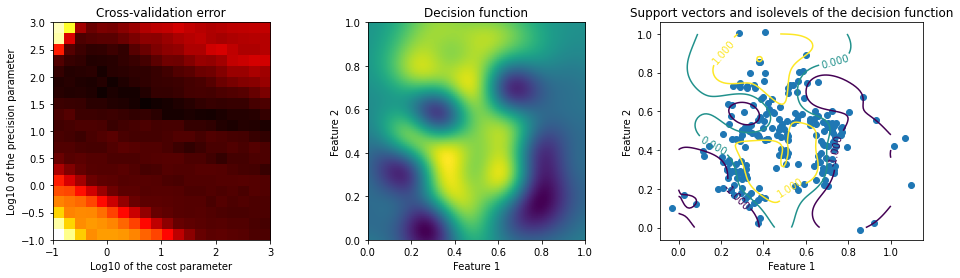

In [9]:
# Sample points on a grid
num_points = 100
x_rng = np.linspace(0, 1, num_points)
y_rng = np.linspace(0, 1, num_points)
grid_x, grid_y = np.meshgrid(x_rng, y_rng)

# Evaluate decision function for each point
xy_list = np.column_stack((grid_x.flat, grid_y.flat))
values = svm.decision_function(xy_list)
values = values.reshape((num_points, num_points))

# Display
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Cross-validation error")
ax.set_xlabel("Log10 of the cost parameter")
ax.set_ylabel("Log10 of the precision parameter")
# TODO (Question 1)
ax.imshow(cv_error, extent=[-1, 3, -1, 3],origin='lower', cmap='hot') #The origin flipped the graph and fixed my issue, but what is it?
# /TODO (Question 1)

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.imshow(values, extent=[0, 1, 0, 1], origin='lower')

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Support vectors and isolevels of the decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# TODO (Question 2)
contPlt = ax.contour(grid_x, grid_y, values, [-1,0,1])
ax.scatter(support_vectors[:,0],support_vectors[:,1])
ax.clabel(contPlt)
# /TODO (Question 2)

plt.show()

## Generalization error

### Load the test data

In [10]:
# Load the training data
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
print(test_features.shape)
print(test_labels.shape)

(500, 2)
(500,)


<a id='question3'></a>

### Print the number of misclassified points in the test set

In [13]:
# TODO (Question 3)
#Same code as 3rd box
predicted_labels = svm.predict(test_features)
error = sum(test_labels != predicted_labels)
print("Prediction error:", error)
# /TODO (Question 3)

Prediction error: 90


In [15]:
correct = sum(test_labels == predicted_labels)
accuracy = correct/(error+correct)
print('Prediction Accuracy:', accuracy)

Prediction Accuracy: 0.82


Cross Validation for our hyperparameters improved our accuracy by 10%. This makes sense as it allows all of our data to act both as training and test set, giving a wider variability that our model tries to fit to.